# Pandas

In this tutorial we will learn to work with tables of data with the `pandas` Python package. Pandas is an industry standard analysis package for data science, so it has many features and is actively being updated and supported (full documentation [here](https://pandas.pydata.org/pandas-docs/stable/)).

## Overview

Pandas has two main data structures that it uses to store tables of data, the **Series** and the **DataFrame**. 

- The **Series** represents a single column of data
- The **DataFrame** is a collention of **Series** columns that make a table

Let's start by exploring the DataFrame in pandas!

In [5]:
# Pandas is commonly aliased as pd
import pandas as pd

## Creating DataFrames

In the `dict` chapter, we saw that dictionaries can be used to represent tables of data. As you may expect, DataFrames can be created directly from dictionaries!

In [6]:
# Daily coffee consumption over 4 weeks
coffees = {
    'Week': ['Sep 2', 'Sep 9', 'Sep 16', 'Sep 23'],
    'Monday': [2, 1, 2, 3],
    'Tuesday': [1, 2, 1, 2],
    'Wednesday': [1, 1, 2, 1],
    'Thursday': [1, 2, 1, 2],
    'Friday': [1, 1, 3, 3]
}
df = pd.DataFrame(coffees)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Week,Monday,Tuesday,Wednesday,Thursday,Friday
0,Sep 2,2,1,1,1,1
1,Sep 9,1,2,1,2,1
2,Sep 16,2,1,2,1,3
3,Sep 23,3,2,1,2,3


We get see the column names using the `.columns` attribute.

In [7]:
df.columns

Index(['Week', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object')

## Slicing and Indexing

Pandas gives a few ways to find your data in a **DataFrame**.

- `[]` raw indexing by *column* like we've seen in `dict`
- `.loc[]` **loc**ate *row* by name
- `.iloc[]` **loc**ate *row* by numerical **i**ndex

Let's try each of these on a subset of our `exoplanets` DataFrame.

In [8]:
df['Monday']

0    2
1    1
2    2
3    3
Name: Monday, dtype: int64

In [5]:
# try locating a row by its week
df.loc['Sep 2']

Uh oh, we didn't tell pandas which of the columns to use as our `Index`. The `Index` is an optional unique identifier of a rows, like a *name*, *ID*, or in our case, the *week*. Let's add an `Index` to our DataFrame.

In [9]:
df = df.set_index('Week')
df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday
Week,,,,,
Sep 2,2,1,1,1,1
Sep 9,1,2,1,2,1
Sep 16,2,1,2,1,3
Sep 23,3,2,1,2,3


Now we can use `.loc[]` to find rows by their Index name!

In [10]:
df.loc['Sep 2']

Monday       2
Tuesday      1
Wednesday    1
Thursday     1
Friday       1
Name: Sep 2, dtype: int64

Finally, we can also specify a rows from our DataFrame by its *numerical* index using `.iloc[]`.

In [11]:
# Get first row in the DataFrame
df.iloc[0]

Monday       2
Tuesday      1
Wednesday    1
Thursday     1
Friday       1
Name: Sep 2, dtype: int64

## DataFrame methods

Now let's read in an example dataset to learn about a few other useful DataFrame methods.

In [12]:
exoplanets = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/planets.csv")

We can check that `pandas` read the table in as a **DataFrame**.

In [13]:
type(exoplanets)

pandas.core.frame.DataFrame

The `DataFrame.info()` method can tell us about the contents of our table.

In [14]:
print(exoplanets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


In the above description, we get the total number of rows (the **RangeIndex**), and the number of non-null entries in each of the columns.

We can get a sense for what the table looks like by printing the first few rows with the `DataFrame.head(num_rows)` method. You can specify a number of rows to `.head()`, otherwise it shows the first 5 by default.

In [15]:
exoplanets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Similarly, we can print rows from the bottom of the table with the `.tail(num_rows)` method. Here we are printing the bottom 2 rows.

In [16]:
exoplanets.tail(2)

,method,number,orbital_period,mass,distance,year
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


## Null data

Dealing with missing data is a major strength of `pandas`. Pandas fills in missing data with a value of `NaN`, but these can be challenging to deal with because many math operations are amiguous or undefined on `NaN` values.

Let's get a list of where the values are in our DataFrame are missing with `.isnull()`. This will give a DataFrame of `bool` with whether or not each entry is null. Below, we use `.tail()` to just print the last 5 rows.


In [17]:
exoplanets.isnull().tail()

,method,number,orbital_period,mass,distance,year
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False
1034,False,False,False,True,False,False


To get a summary of how many `NaN`s are in each column, we can use the `.sum()` method (recall that `bool` values in Python are equivalent to 0 and 1 in Python and can be summed).

In [18]:
exoplanets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Here we've converted each null entry to `True`, then summed each of the boolean columns. Since `False == 0`, we get a count of the `True == 1` (in this case the null valued) entries in each column.

To get rid of these null values, we have a few options. Sometimes we want to completely drop all rows with missing data and we can do this with `dropna()`.


In [19]:
exo = exoplanets.dropna()
exo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 784
Data columns (total 6 columns):
method            498 non-null object
number            498 non-null int64
orbital_period    498 non-null float64
mass              498 non-null float64
distance          498 non-null float64
year              498 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 27.2+ KB


Now we have 498 rows without missing values remaining. Let's verify this with the sum trick we saw above.

In [20]:
exo.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

If instead we want to fill the null values with some default value, we can use the `.fillna()` method.

In [21]:
exo_filled = exoplanets.fillna(0)
exo_filled.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,0.0,172.0,2006
1031,Transit,1,2.615864,0.0,148.0,2007
1032,Transit,1,3.191524,0.0,174.0,2007
1033,Transit,1,4.125083,0.0,293.0,2008
1034,Transit,1,4.187757,0.0,260.0,2008


In [22]:
exo_filled.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

## And More

Often we want to select data from a table on some condition. Say we want all of the rows where the detection method was *microlensing*, we could do:

In [23]:
exoplanets[exoplanets['method'] == 'Microlensing']

,method,number,orbital_period,mass,distance,year
902,Microlensing,1,NaN,NaN,NaN,2008
903,Microlensing,1,NaN,NaN,NaN,2008
904,Microlensing,1,NaN,NaN,NaN,2009
905,Microlensing,1,NaN,NaN,3600.0,2013
906,Microlensing,1,2780.0,NaN,NaN,2011
907,Microlensing,1,NaN,NaN,NaN,2010
908,Microlensing,1,1970.0,NaN,NaN,2010
909,Microlensing,1,NaN,NaN,2300.0,2012
910,Microlensing,1,NaN,NaN,2800.0,2012
911,Microlensing,1,NaN,NaN,7720.0,2012


Say we want all exoplanets detected between 2009 and 2011. We can do this by combining two boolean expressions with a `&`.

In [24]:
exoplanets[(exoplanets['year'] >= 2009) & (exoplanets['year'] <= 2011)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 2 to 1027
Data columns (total 6 columns):
method            385 non-null object
number            385 non-null int64
orbital_period    376 non-null float64
mass              206 non-null float64
distance          331 non-null float64
year              385 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 21.1+ KB


Pandas also has a useful summary method which gives statistics on each of the columns called `.describe()`. This can be a quick way to see if the mimima, maxima and means of each column are what you expect.

In [25]:
exoplanets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


Finally, we can plot a dataframe directly with the `.plot()` method. This method uses `pyplot` from `matplotlib` and accepts most of the same arguments that you would pass to `matplotlib.pyplot.plot()`. The conveniece of plotting directly from a DataFrame is being able to specify the names of columns as the x and y axes.

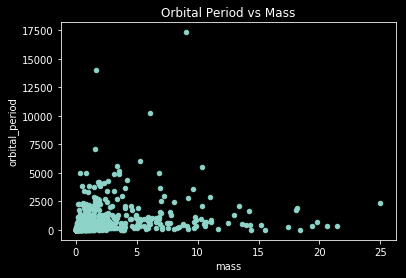

In [26]:
exoplanets.plot(kind='scatter', x='mass', y='orbital_period', title='Orbital Period vs Mass')

## Practice

We will read in the fuel economy dataset, **mpg** from https://github.com/mwaskom/seaborn-data below. 


In [27]:
mpg = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/mpg.csv")

1. Use the `.info()`, `.describe()`, and `.head()` methods to get acquainted with the dataset - are there null values for any columns? What is the minimum and maximum number of cylinders of cars in the dataset?
2. If any rows have null values, use `.dropna()` to remove those rows
3. Create a new variable, `mpg4` with only the 4-cylinder engine cars
4. Using the 4-cylinder car DataFrame, make a scatter plot of the *mpg* (fuel economy) vs *horsepower*
5. Plot a histogram (you can do this with `.plot(kind='hist)`) of the *mpg* for only the cars whose *origin* is "usa"

In [28]:
# Answer the above problems here!

